In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
fin_aapl_data = pd.read_csv('../data/AAPL/financial_data.csv')
sentiment_aapl_data = pd.read_csv('../data/AAPL/news_sentiment.csv')

In [3]:
fin_aapl_data.head()

,Date,SMA_10,SMA_15,SMA_20,SMA_50,SMA_100,SMA_200,EMA_10,EMA_12,EMA_14,...,Stoch_21_signal,Stoch_28,Stoch_28_signal,ATR_14,ATR_20,ATR_28,CMF_14,CMF_20,CMF_28,target
0,2010-01-04,0.963623,0.945426,0.934846,0.933008,0.883653,0.755846,0.968436,0.963540,0.959512,...,92.072873,98.102255,92.072873,0.019581,0.019875,0.019913,0.192531,0.006533,-0.084723,0.172893
1,2010-01-05,0.970799,0.949924,0.938145,0.932254,0.884416,0.757172,0.972808,0.967742,0.963475,...,93.621141,95.503529,93.621141,0.018931,0.019395,0.019558,0.124335,0.034848,-0.117104,-1.590632
2,2010-01-06,0.992530,0.969699,0.958527,0.947989,0.900728,0.771859,0.990617,0.985940,0.981842,...,92.145820,82.831675,92.145820,0.019379,0.019784,0.019923,0.083341,0.049708,-0.151361,-0.184871
3,2010-01-07,0.999221,0.976690,0.965220,0.950514,0.904477,0.775760,0.993824,0.989648,0.985839,...,86.567888,81.382317,86.572507,0.019029,0.019531,0.019747,0.110852,0.078307,-0.137121,0.664833
4,2010-01-08,0.997283,0.975570,0.962190,0.945615,0.900975,0.773125,0.989577,0.985710,0.982084,...,83.306671,86.584861,83.599618,0.018544,0.019125,0.019412,0.206804,0.061121,-0.104320,-0.882147


In [4]:
sentiment_aapl_data.head()

,date,stock,title,content,positive,neutral,negative
0,2009-12-14,AAPL,RadioShack (RSH +3.7%) should post outsized ga...,RadioShack (RSH\n+3.7%) should post outsized g...,0.293675,0.012213,0.694112
1,2009-12-18,AAPL,AT&T (NYSE:T) has responded to criticism of it...,AT&T (NYSE:T) has responded to criticism of it...,0.074762,0.335630,0.589608
2,2009-12-21,AAPL,Yelp reportedly shuns an all-but-signed deal t...,Yelp reportedly shuns an all-but-signed deal t...,0.066094,0.015236,0.918670
3,2009-12-22,AAPL,Sources say CBS (NYSE:CBS) and Disney (NYSE:DI...,Sources say CBS (NYSE:CBS) and Disney (NYSE:DI...,0.145811,0.009512,0.844678
4,2009-12-25,AAPL,Top two spots on Amazon.com's (NASDAQ:AMZN) Mo...,Top two spots on Amazon.com's (NASDAQ:AMZN) Mo...,0.047836,0.025446,0.926718


In [7]:
sentiment_aapl_data = sentiment_aapl_data[['date', 'positive', 'negative', 'neutral']]
sentiment_aapl_data.head()

,date,positive,negative,neutral
0,2009-12-14,0.293675,0.694112,0.012213
1,2009-12-18,0.074762,0.589608,0.335630
2,2009-12-21,0.066094,0.918670,0.015236
3,2009-12-22,0.145811,0.844678,0.009512
4,2009-12-25,0.047836,0.926718,0.025446


In [14]:
# group by date and take the mean of the sentiment scores
sentiment_aapl_data = sentiment_aapl_data.groupby('date').mean().reset_index()
sentiment_aapl_data.head()

,date,positive,negative,neutral
0,2009-12-14,0.293675,0.694112,0.012213
1,2009-12-18,0.074762,0.589608,0.335630
2,2009-12-21,0.066094,0.918670,0.015236
3,2009-12-22,0.145811,0.844678,0.009512
4,2009-12-25,0.047836,0.926718,0.025446


In [23]:
# merge the two dataframes
aapl_data = pd.merge(fin_aapl_data, sentiment_aapl_data, left_on='Date', right_on='date', how='outer')
aapl_data = aapl_data.drop('date', axis=1)
aapl_data.head(20)

,Date,SMA_10,SMA_15,SMA_20,SMA_50,SMA_100,SMA_200,EMA_10,EMA_12,EMA_14,...,ATR_14,ATR_20,ATR_28,CMF_14,CMF_20,CMF_28,target,positive,negative,neutral
0,2010-01-04,0.963623,0.945426,0.934846,0.933008,0.883653,0.755846,0.968436,0.963540,0.959512,...,0.019581,0.019875,0.019913,0.192531,0.006533,-0.084723,0.172893,0.074515,0.898590,0.026896
1,2010-01-05,0.970799,0.949924,0.938145,0.932254,0.884416,0.757172,0.972808,0.967742,0.963475,...,0.018931,0.019395,0.019558,0.124335,0.034848,-0.117104,-1.590632,0.100562,0.838226,0.061212
2,2010-01-06,0.992530,0.969699,0.958527,0.947989,0.900728,0.771859,0.990617,0.985940,0.981842,...,0.019379,0.019784,0.019923,0.083341,0.049708,-0.151361,-0.184871,0.054459,0.917972,0.027569
3,2010-01-07,0.999221,0.976690,0.965220,0.950514,0.904477,0.775760,0.993824,0.989648,0.985839,...,0.019029,0.019531,0.019747,0.110852,0.078307,-0.137121,0.664833,0.066111,0.810185,0.123704
4,2010-01-08,0.997283,0.975570,0.962190,0.945615,0.900975,0.773125,0.989577,0.985710,0.982084,...,0.018544,0.019125,0.019412,0.206804,0.061121,-0.104320,-0.882147,0.803324,0.186314,0.010363
5,2010-01-11,1.006668,0.990043,0.974009,0.955716,0.911188,0.782391,0.998678,0.995332,0.992048,...,0.018919,0.019413,0.019658,0.106156,0.091102,-0.106335,-1.137513,0.068580,0.912741,0.018680
6,2010-01-12,1.016378,1.005379,0.988357,0.967808,0.923748,0.793821,1.008320,1.005741,1.003001,...,0.019039,0.019543,0.019809,0.063156,0.096172,-0.084051,1.410553,NaN,NaN,NaN
7,2010-01-13,1.002977,0.995326,0.977854,0.956449,0.913003,0.785299,0.995332,0.993020,0.990510,...,0.019749,0.019929,0.019994,0.113173,0.110804,-0.005066,-0.579154,NaN,NaN,NaN
8,2010-01-14,1.007764,1.004011,0.987194,0.963942,0.920242,0.792364,1.000925,0.998989,0.996776,...,0.019001,0.019432,0.019670,0.053577,0.116332,0.008287,-1.671203,0.035789,0.684529,0.279682
9,2010-01-15,1.022561,1.022315,1.006619,0.981994,0.937673,0.808192,1.014675,1.013511,1.011888,...,0.019931,0.020165,0.020283,-0.091968,0.072946,-0.011186,4.423831,0.346225,0.555676,0.098099


In [24]:
# fill nan values with the previous value
aapl_data = aapl_data.fillna(method='ffill')
aapl_data.head(20)

/var/folders/7_/dryv_qwx5t15nn_mf9cj1yb40000gn/T/ipykernel_9611/116716781.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data = aapl_data.fillna(method='ffill')


,Date,SMA_10,SMA_15,SMA_20,SMA_50,SMA_100,SMA_200,EMA_10,EMA_12,EMA_14,...,ATR_14,ATR_20,ATR_28,CMF_14,CMF_20,CMF_28,target,positive,negative,neutral
0,2010-01-04,0.963623,0.945426,0.934846,0.933008,0.883653,0.755846,0.968436,0.963540,0.959512,...,0.019581,0.019875,0.019913,0.192531,0.006533,-0.084723,0.172893,0.074515,0.898590,0.026896
1,2010-01-05,0.970799,0.949924,0.938145,0.932254,0.884416,0.757172,0.972808,0.967742,0.963475,...,0.018931,0.019395,0.019558,0.124335,0.034848,-0.117104,-1.590632,0.100562,0.838226,0.061212
2,2010-01-06,0.992530,0.969699,0.958527,0.947989,0.900728,0.771859,0.990617,0.985940,0.981842,...,0.019379,0.019784,0.019923,0.083341,0.049708,-0.151361,-0.184871,0.054459,0.917972,0.027569
3,2010-01-07,0.999221,0.976690,0.965220,0.950514,0.904477,0.775760,0.993824,0.989648,0.985839,...,0.019029,0.019531,0.019747,0.110852,0.078307,-0.137121,0.664833,0.066111,0.810185,0.123704
4,2010-01-08,0.997283,0.975570,0.962190,0.945615,0.900975,0.773125,0.989577,0.985710,0.982084,...,0.018544,0.019125,0.019412,0.206804,0.061121,-0.104320,-0.882147,0.803324,0.186314,0.010363
5,2010-01-11,1.006668,0.990043,0.974009,0.955716,0.911188,0.782391,0.998678,0.995332,0.992048,...,0.018919,0.019413,0.019658,0.106156,0.091102,-0.106335,-1.137513,0.068580,0.912741,0.018680
6,2010-01-12,1.016378,1.005379,0.988357,0.967808,0.923748,0.793821,1.008320,1.005741,1.003001,...,0.019039,0.019543,0.019809,0.063156,0.096172,-0.084051,1.410553,0.068580,0.912741,0.018680
7,2010-01-13,1.002977,0.995326,0.977854,0.956449,0.913003,0.785299,0.995332,0.993020,0.990510,...,0.019749,0.019929,0.019994,0.113173,0.110804,-0.005066,-0.579154,0.068580,0.912741,0.018680
8,2010-01-14,1.007764,1.004011,0.987194,0.963942,0.920242,0.792364,1.000925,0.998989,0.996776,...,0.019001,0.019432,0.019670,0.053577,0.116332,0.008287,-1.671203,0.035789,0.684529,0.279682
9,2010-01-15,1.022561,1.022315,1.006619,0.981994,0.937673,0.808192,1.014675,1.013511,1.011888,...,0.019931,0.020165,0.020283,-0.091968,0.072946,-0.011186,4.423831,0.346225,0.555676,0.098099


In [58]:
X = aapl_data.drop(['Date', 'target'], axis=1)
y = aapl_data['target']
y = np.where(y > 0, 1, 0)

n_train = 1000
n_test = 500

X_train = X[:n_train]
X_test = X[n_train:n_train+n_test]
y_train = y[:n_train]
y_test = y[n_train:n_train+n_test]

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

In [60]:
# Conversion en DMatrix pour XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Paramètres du modèle XGBoost
params = {
    'objective': 'binary:logistic',  # Fonction de perte pour la classification binaire
    'eval_metric': 'logloss',       # Métrique d'évaluation
    'max_depth': 4,                 # Profondeur maximale de l'arbre
    'eta': 0.1,                     # Taux d'apprentissage
    'seed': 42
}

# Entraînement du modèle
bst = xgb.train(params, dtrain, num_boost_round=100)

In [61]:
# Prédictions
y_pred_prob = bst.predict(dtest)  # Probabilités
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Conversion en classes

# Calcul des métriques
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.536
Precision: 0.5359712230215827
Recall: 0.5912698412698413
F1 Score: 0.5622641509433963


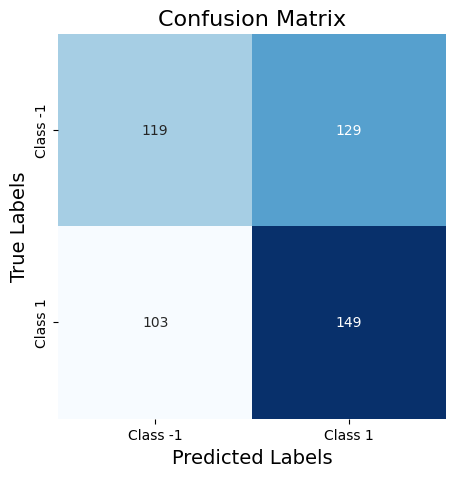

In [62]:
def plot_confusion_matrix(conf_matrix, class_names):
    """
    Affiche une matrice de confusion sous forme de heatmap.
    
    Parameters:
        conf_matrix (array): Matrice de confusion
        class_names (list): Liste des noms des classes
    """
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

# Appel de la fonction avec les noms des classes
plot_confusion_matrix(conf_matrix, class_names=["Class -1", "Class 1"])


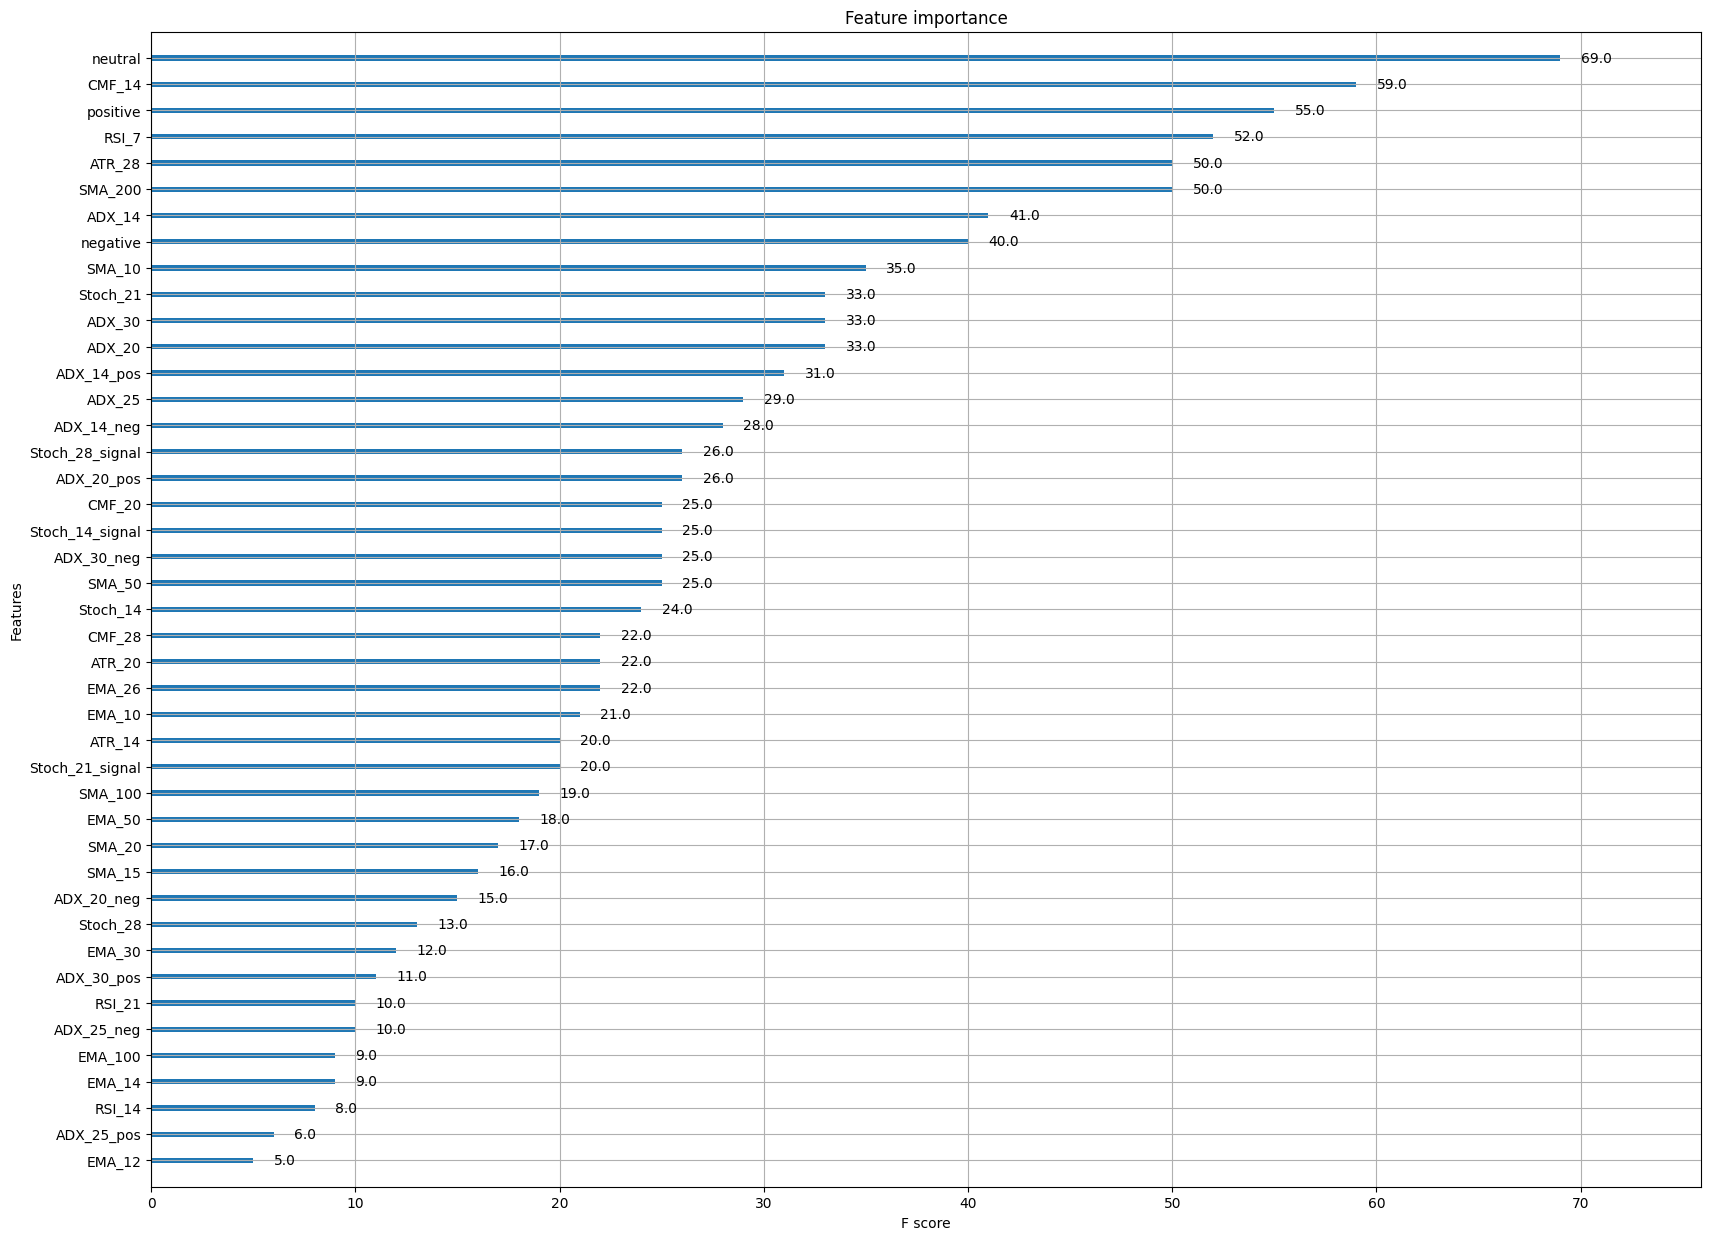

In [63]:
# Affichage de l'importance des features
plt.figure(figsize=(20, 15))
xgb.plot_importance(bst, ax=plt.gca())
plt.show()
